## Declarando as bibliotecas

In [ ]:
!pip install wikipedia
from operator import itemgetter
import networkx as nx
import wikipedia
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
sns.set()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11695 sha256=875c346a82d2393da2bc15e964ac3ac0ff2feff786e9c9f328bdd77015e2fcde
  Stored in directory: /root/.cache/pip/wheels/07/93/05/72c05349177dca2e0ba31a33ba4f7907606f7ddef303517c6a
Successfully built wikipedia


##Linkando com a Wikipedia

In [ ]:
SEED = "Thermoeconomics".title()
STOPS = ("International Standard Serial Number",
         "International Standard Book Number",
         "National Diet Library",
         "International Standard Name Identifier",
         "International Standard Book Number (Identifier)",
         "Pubmed Identifier",
         "Issn (Identifier)", 
         "Pubmed Central",
         "Digital Object Identifier", 
         "Arxiv",
         "Proc Natl Acad Sci Usa", 
         "Bibcode",
         "Library Of Congress Control Number", 
         "Jstor",
         "Doi (Identifier)",
         "S2Cid (Identifier)",
         "Jstor (Identifier)",
         "Oclc (Identifier)",
         "Isbn (Identifier)",
         "Pmid (Identifier)",
         "Arxiv (Identifier)",
         "Bibcode (Identifier)")


todo_lst = [(0, SEED)]
todo_set = set(SEED)
done_set = set()

In [ ]:
g = nx.DiGraph()
layer, page = todo_lst[0]

In [ ]:
%%time
while layer < 2:
  # Remove the name page of the current page from the todo_lst, 
  # and add it to the set of processed pages. 
  # If the script encounters this page again, it will skip over it.
  del todo_lst[0]
  done_set.add(page)
  
  # Show progress
  print(layer, page) 
  
  # Attempt to download the selected page.
  try:
    wiki = wikipedia.page(page, auto_suggest=False)
  except:
    print("Could not load", page)
    layer, page = todo_lst[0]
    continue
  
  for link in wiki.links:
    link = link.title()
    if link not in STOPS and not link.startswith("List Of"):
      if link not in todo_set and link not in done_set:
        todo_lst.append((layer + 1, link))
        todo_set.add(link)
      g.add_edge(page, link)
  layer, page = todo_lst[0]

0 Thermoeconomics
1 American School (Economics)
Could not load American School (Economics)
1 Anarchist Economics
Could not load Anarchist Economics
1 Ancient Economic Thought
Could not load Ancient Economic Thought
1 Antoine Lavoisier
1 Austrian School
1 Behavioral Economics
1 Bioeconomics (Fisheries)
Could not load Bioeconomics (Fisheries)
1 Biological Evolution
Could not load Biological Evolution
1 Birmingham School (Economics)
Could not load Birmingham School (Economics)
1 Buddhist Economics
1 Cameralism
1 Capability Approach
1 Carbon Fee And Dividend
Could not load Carbon Fee And Dividend
1 Carnegie School
1 Carrying Capacity
1 Chartalism
1 Chicago School Of Economics
1 Class Structure
Could not load Class Structure
1 Classical Economics
1 Clive Spash
1 Constitutional Economics
Could not load Constitutional Economics
1 Critique Of Political Economy
Could not load Critique Of Political Economy
1 Degrowth
1 Disequilibrium Macroeconomics
Could not load Disequilibrium Macroeconomics
1 

In [ ]:
print("{} nodes, {} edges".format(len(g), nx.number_of_edges(g)))

16620 nodes, 40929 edges


## Processamento dos dados

In [ ]:
original = g.copy()

g.remove_edges_from(nx.selfloop_edges(g))

duplicates = [(node, node + "s") 
              for node in g if node + "s" in g
             ]

for dup in duplicates:
  g = nx.contracted_nodes(g, *dup, self_loops=False)

print(duplicates)

duplicates = [(x, y) for x, y in 
              [(node, node.replace("-", " ")) for node in g]
                if x != y and y in g]
print(duplicates)

for dup in duplicates:
  g = nx.contracted_nodes(g, *dup, self_loops=False)

nx.set_node_attributes(g, 0,"contraction")
nx.set_edge_attributes(g, 0,"contraction")

[('Economic System', 'Economic Systems'), ('Market Failure', 'Market Failures'), ('Capital Good', 'Capital Goods'), ('Capital Market', 'Capital Markets'), ('Corporation', 'Corporations'), ('Economist', 'Economists'), ('National Saving', 'National Savings'), ('Opportunity Cost', 'Opportunity Costs'), ('School Voucher', 'School Vouchers'), ('Thought Experiment', 'Thought Experiments'), ('Behavioral Science', 'Behavioral Sciences'), ('Econometric', 'Econometrics'), ('Economic Agent', 'Economic Agents'), ('Economic Rent', 'Economic Rents'), ('Heuristic', 'Heuristics'), ('Natural Experiment', 'Natural Experiments'), ('Transaction Cost', 'Transaction Costs'), ('Wage', 'Wages'), ('Cooperative', 'Cooperatives'), ('Ecovillage', 'Ecovillages'), ('Freedom', 'Freedoms'), ('Right', 'Rights'), ('Biogeochemical Cycle', 'Biogeochemical Cycles'), ('Ecosystem', 'Ecosystems'), ('Microorganism', 'Microorganisms'), ('Nutrient Cycle', 'Nutrient Cycles'), ('Resource', 'Resources'), ('Rational Agent', 'Ration

In [ ]:
print("{} nodes, {} edges".format(len(g), nx.number_of_edges(g)))

16464 nodes, 40822 edges


##Truncamento do Network

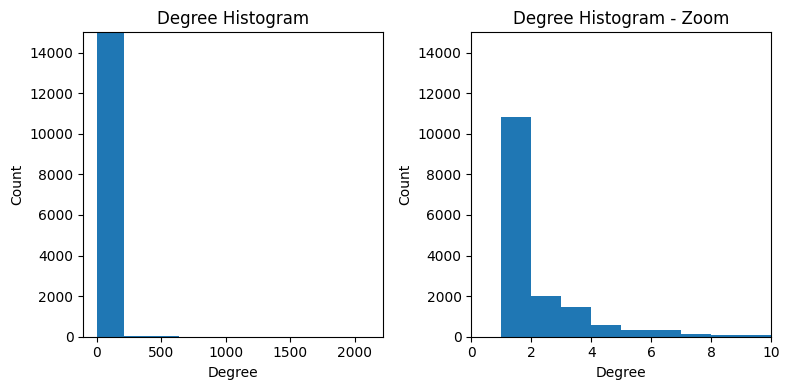

In [ ]:
plt.style.use("default")
# degree sequence
degree_sequence = sorted([d for n, d in g.degree()], reverse=True)  

fig, ax = plt.subplots(1,2,figsize=(8,4))

# all_data has information about degree_sequence and the width of each bin
ax[0].hist(degree_sequence)
ax[1].hist(degree_sequence,bins=[1,2,3,4,5,6,7,8,9,10])

ax[0].set_title("Degree Histogram")
ax[0].set_ylabel("Count")
ax[0].set_xlabel("Degree")
ax[0].set_ylim(0,15000)

ax[1].set_title("Degree Histogram - Zoom")
ax[1].set_ylabel("Count")
ax[1].set_xlabel("Degree")
ax[1].set_xlim(0,10)
ax[1].set_ylim(0,15000)

plt.tight_layout()
plt.show()

In [ ]:
core = [node for node, deg in dict(g.degree()).items() if deg >= 2]
gsub = nx.subgraph(g, core)

print("{} nodes, {} edges".format(len(gsub), nx.number_of_edges(gsub)))

nx.write_graphml(gsub, "cna.graphml")

5615 nodes, 29973 edges


##Explorando o Network

In [ ]:
gsub = nx.read_graphml('cna.graphml')

top_indegree = sorted(dict(gsub.in_degree()).items(),
                      reverse=True, key=itemgetter(1))[:100]
print("\n".join(map(lambda t: "{} {}".format(*reversed(t)), top_indegree)))

71 Ecological Economics
68 Thermoeconomics
63 Economic
56 Degrowth
53 Mainstream Economics
53 Environmental Economics
52 Critique Of Political Economy
52 Heterodox Economics
52 Political Economy
50 Neoclassical Economics
50 History Of Economic Thought
50 Evolutionary Economics
49 Wayback Machine
49 Schools Of Economic Thought
49 Institutional Economics
48 Feminist Economics
48 Buddhist Economics
48 Behavioral Economics
48 Marxian Economics
47 Public Choice
47 Classical Economics
47 Keynesian Economics
47 Austrian School
47 New-Keynesian Economics
46 Mutualism (Economic Theory)
46 Real Business-Cycle Theory
46 Disequilibrium Macroeconomics
46 Post-Keynesian Economics
46 Malthusianism
46 Stockholm School (Economics)
46 Karl Marx
46 Monetary Circuit Theory
45 Modern Monetary Theory
45 Anarchist Economics
45 Mercantilism
45 Neo-Keynesian Economics
45 Economic System
45 Georgism
45 New Classical Macroeconomics
45 Supply-Side Economics
45 Chartalism
44 Socialist Economics
44 John Maynard Key

AttributeError: ignored

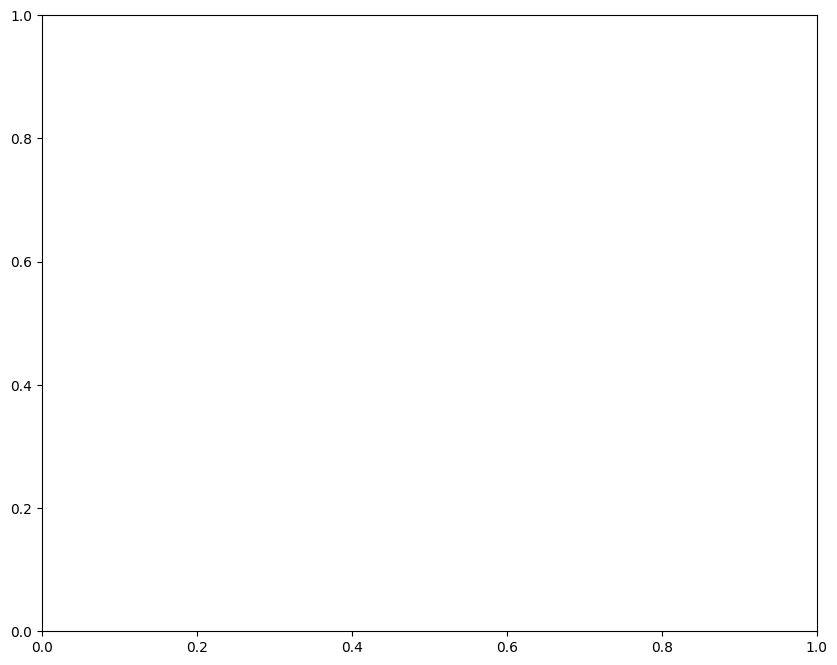

In [ ]:
# the degree centrality of network(gsub)
fig, ax = plt.subplots(1,1,figsize=(10,8))

# layout position
pos = nx.spring_layout(gsub,seed=123456789,k=0.3)
# color of nodes
color = list(dict(nx.degree_centrality(gsub)).values())


# draw edges
nx.draw_networkx_edges(gsub,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(gsub,
                 pos=pos,
                 node_color=color,
                 cmap=plt.cm.jet,
                 ax=ax)

# draw labels
nx.draw_networkx_labels(gsub, pos=pos,
                        font_color='white', ax=ax)


plt.axis("off")
plt.colorbar(nodes)
plt.savefig('degree_centrality.png', transparent=True,dpi=300)
plt.show()

##Centrality distributions

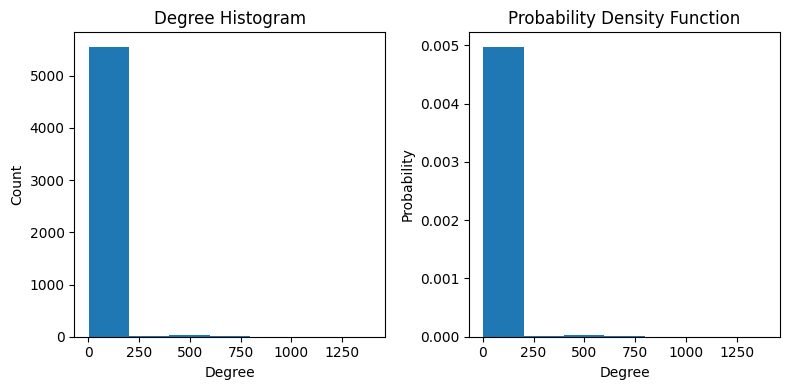

In [ ]:
plt.style.use("default")
# degree sequence
degree_sequence = sorted([d for n, d in gsub.degree()], reverse=True)  

fig, ax = plt.subplots(1,2,figsize=(8,4))

# all_data has information about degree_sequence and the width of each bin
all_data = ax[0].hist(degree_sequence,bins=7)
ax[1].hist(degree_sequence,bins=7,density=True)

ax[0].set_title("Degree Histogram")
ax[0].set_ylabel("Count")
ax[0].set_xlabel("Degree")

ax[1].set_title("Probability Density Function")
ax[1].set_ylabel("Probability")
ax[1].set_xlabel("Degree")

plt.tight_layout()
plt.show()

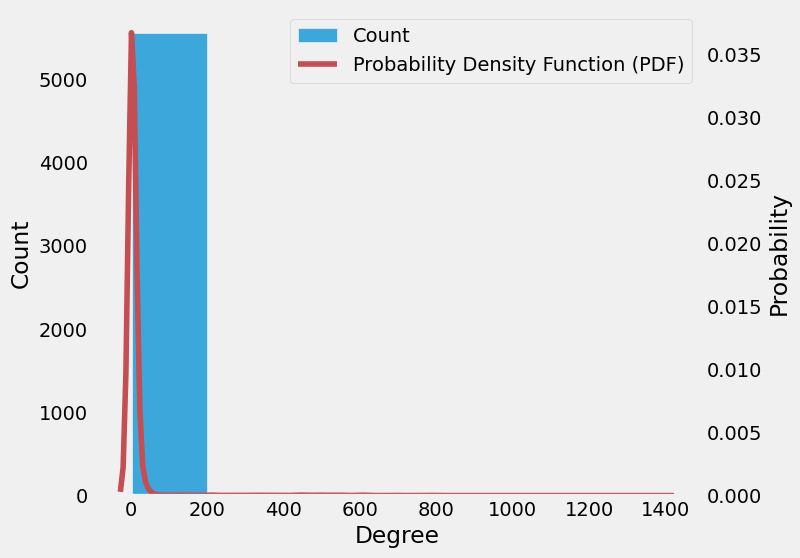

In [ ]:
plt.style.use("fivethirtyeight")

fig, ax = plt.subplots(1,1,figsize=(7,6))

sns.histplot(degree_sequence,bins=7,label="Count",ax=ax)
ax2 = ax.twinx()
sns.kdeplot(degree_sequence,color='r',label="Probability Density Function (PDF)",ax=ax2)

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.grid(False)
ax2.grid(False)
ax.set_xlabel("Degree")
ax2.set_ylabel("Probability")

plt.show()

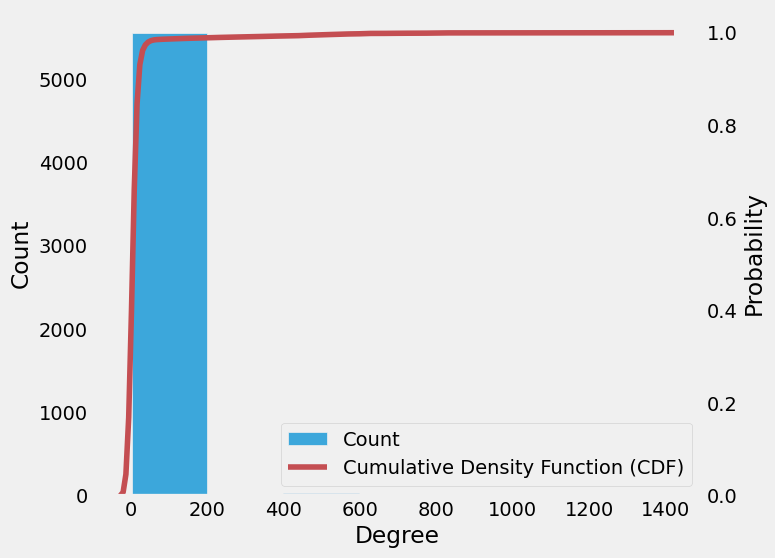

In [ ]:
plt.style.use("fivethirtyeight")
#plt.style.use("default")

fig, ax = plt.subplots(1,1,figsize=(7,6))

sns.histplot(degree_sequence,bins=7,label="Count",ax=ax)
ax2 = ax.twinx()
sns.kdeplot(degree_sequence,color='r',label="Cumulative Density Function (CDF)",ax=ax2,cumulative=True)

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.grid(False)
ax2.grid(False)
ax.set_xlabel("Degree")
ax2.set_ylabel("Probability")

plt.savefig('cumulative_density_function.png', transparent=True,dpi=600,bbox_inches="tight")
plt.show()

In [ ]:
# filter nodes with degree greater than or equal to 2
core = [node for node, deg in dict(gsub.degree()).items() if deg > 100]

# select a subgraph with 'core' nodes
gsub2 = nx.subgraph(gsub, core)

print("{} nodes, {} edges".format(len(gsub2), nx.number_of_edges(gsub2)))

77 nodes, 2466 edges


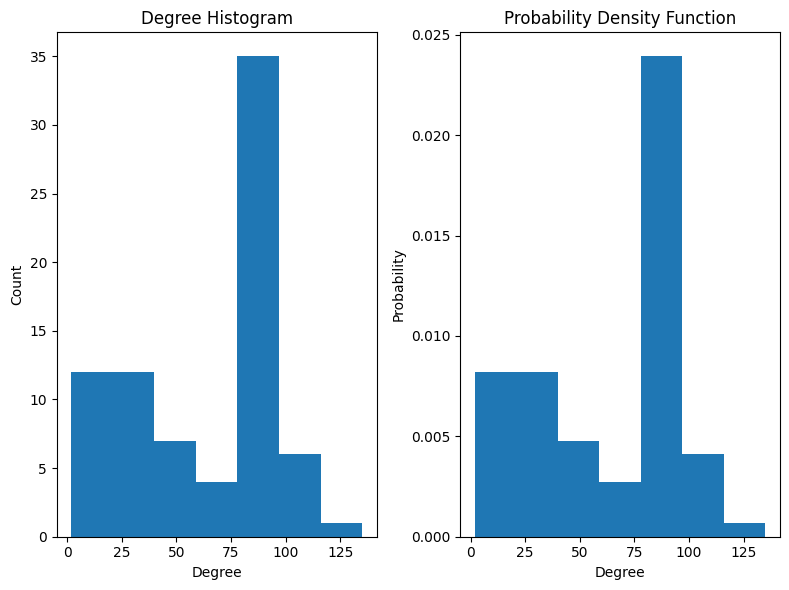

In [ ]:
plt.style.use("default")
# degree sequence
degree_sequence = sorted([d for n, d in gsub2.degree()], reverse=True)  

fig, ax = plt.subplots(1,2,figsize=(8,6))

# all_data has information about degree_sequence and the width of each bin
all_data = ax[0].hist(degree_sequence,bins=7)
ax[1].hist(degree_sequence,bins=7,density=True)

ax[0].set_title("Degree Histogram")
ax[0].set_ylabel("Count")
ax[0].set_xlabel("Degree")

ax[1].set_title("Probability Density Function")
ax[1].set_ylabel("Probability")
ax[1].set_xlabel("Degree")

plt.tight_layout()
plt.show()

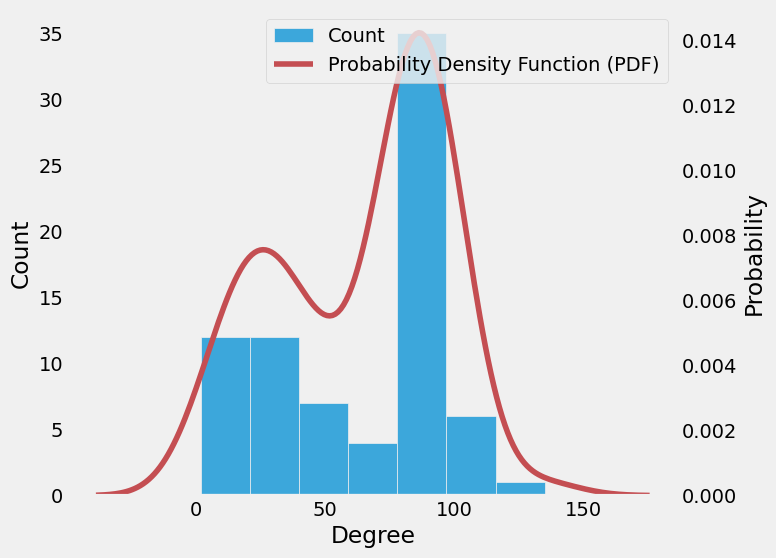

In [ ]:
plt.style.use("fivethirtyeight")
#plt.style.use("default")

fig, ax = plt.subplots(1,1,figsize=(7,6))

sns.histplot(degree_sequence,bins=7,label="Count",ax=ax)
ax2 = ax.twinx()
sns.kdeplot(degree_sequence,color='r',label="Probability Density Function (PDF)",ax=ax2)

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.grid(False)
ax2.grid(False)
ax.set_xlabel("Degree")
ax2.set_ylabel("Probability")

plt.savefig('probability_density_function.png', transparent=True,dpi=600,bbox_inches="tight")
plt.show()

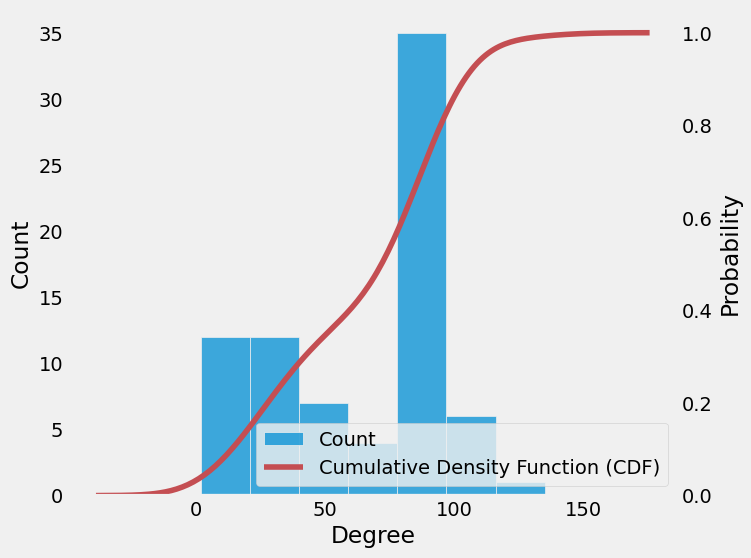

In [ ]:
plt.style.use("fivethirtyeight")
#plt.style.use("default")

fig, ax = plt.subplots(1,1,figsize=(7,6))

sns.histplot(degree_sequence,bins=7,label="Count",ax=ax)
ax2 = ax.twinx()
sns.kdeplot(degree_sequence,color='r',label="Cumulative Density Function (CDF)",ax=ax2,cumulative=True)

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.grid(False)
ax2.grid(False)
ax.set_xlabel("Degree")
ax2.set_ylabel("Probability")

plt.savefig('cumulative_density_function.png', transparent=True,dpi=600,bbox_inches="tight")
plt.show()

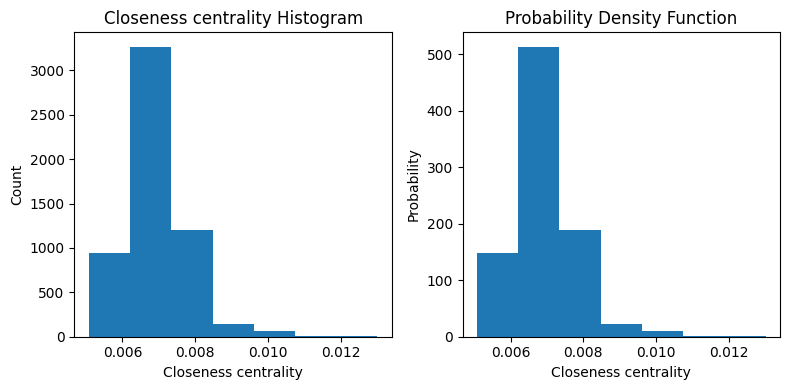

In [ ]:
plt.style.use("default")
# degree sequence
degree_sequence = sorted([v for k, v in nx.closeness_centrality(gsub).items()], reverse=True)  

fig, ax = plt.subplots(1,2,figsize=(8,4))

# all_data has information about degree_sequence and the width of each bin
all_data = ax[0].hist(degree_sequence,bins=7)
ax[1].hist(degree_sequence,bins=7,density=True)

ax[0].set_title("Closeness centrality Histogram")
ax[0].set_ylabel("Count")
ax[0].set_xlabel("Closeness centrality")

ax[1].set_title("Probability Density Function")
ax[1].set_ylabel("Probability")
ax[1].set_xlabel("Closeness centrality")

plt.tight_layout()
plt.show()

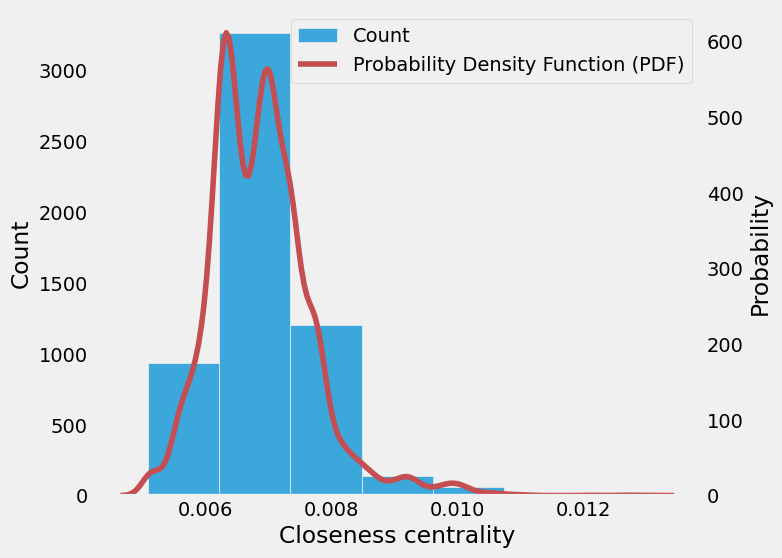

In [ ]:

plt.style.use("fivethirtyeight")

fig, ax = plt.subplots(1,1,figsize=(7,6))

sns.histplot(degree_sequence,bins=7,label="Count",ax=ax)
ax2 = ax.twinx()
sns.kdeplot(degree_sequence,color='r',label="Probability Density Function (PDF)",ax=ax2)

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.grid(False)
ax2.grid(False)
ax.set_xlabel("Closeness centrality")
ax2.set_ylabel("Probability")

plt.show()

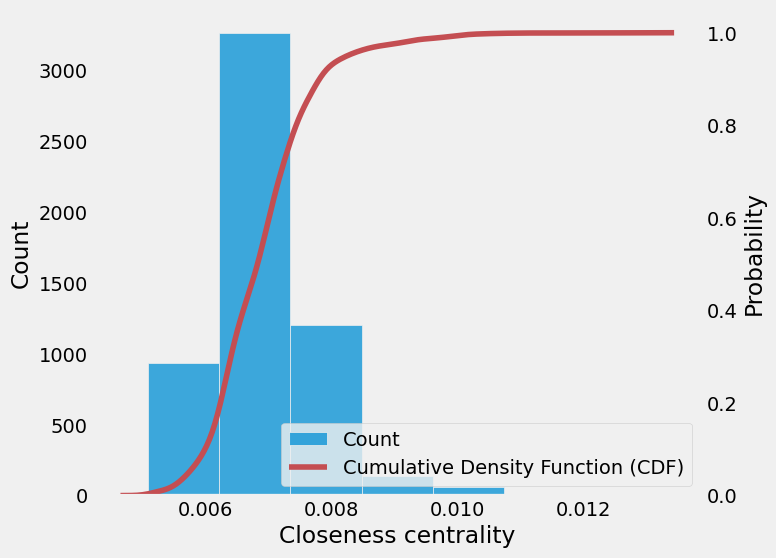

In [ ]:
plt.style.use("fivethirtyeight")

fig, ax = plt.subplots(1,1,figsize=(7,6))

sns.histplot(degree_sequence,bins=7,label="Count",ax=ax)
ax2 = ax.twinx()
sns.kdeplot(degree_sequence,color='r',label="Cumulative Density Function (CDF)",ax=ax2,cumulative=True)

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.grid(False)
ax2.grid(False)
ax.set_xlabel("Closeness centrality")
ax2.set_ylabel("Probability")

plt.show()

In [ ]:
bc = pd.Series(nx.betweenness_centrality(gsub))
dc = pd.Series(nx.degree_centrality(gsub))
ec = pd.Series(nx.eigenvector_centrality(gsub))
cc = pd.Series(nx.closeness_centrality(gsub))

df = pd.DataFrame.from_dict({"Betweenness": bc,
                            "Degree": dc,
                            "EigenVector": ec,
                            "Closeness": cc})
df.reset_index(inplace=True,drop=True)
df.head()

,Betweenness,Degree,EigenVector,Closeness
0,0.0,0.000534,0.002644,0.007349
1,0.0,0.000534,0.004161,0.007090
2,0.0,0.000534,0.005423,0.006384
3,0.0,0.000356,0.002919,0.006135
4,0.0,0.000534,0.004084,0.007090


In [ ]:
# without betweenness
dc = pd.Series(nx.degree_centrality(gsub))
ec = pd.Series(nx.eigenvector_centrality(gsub))
cc = pd.Series(nx.closeness_centrality(gsub))

df = pd.DataFrame.from_dict({"Degree": dc,
                            "EigenVector": ec,
                            "Closeness": cc})
df.reset_index(inplace=True,drop=True)
df.head()

,Degree,EigenVector,Closeness
0,0.000534,0.002644,0.007349
1,0.000534,0.004161,0.007090
2,0.000534,0.005423,0.006384
3,0.000356,0.002919,0.006135
4,0.000534,0.004084,0.007090


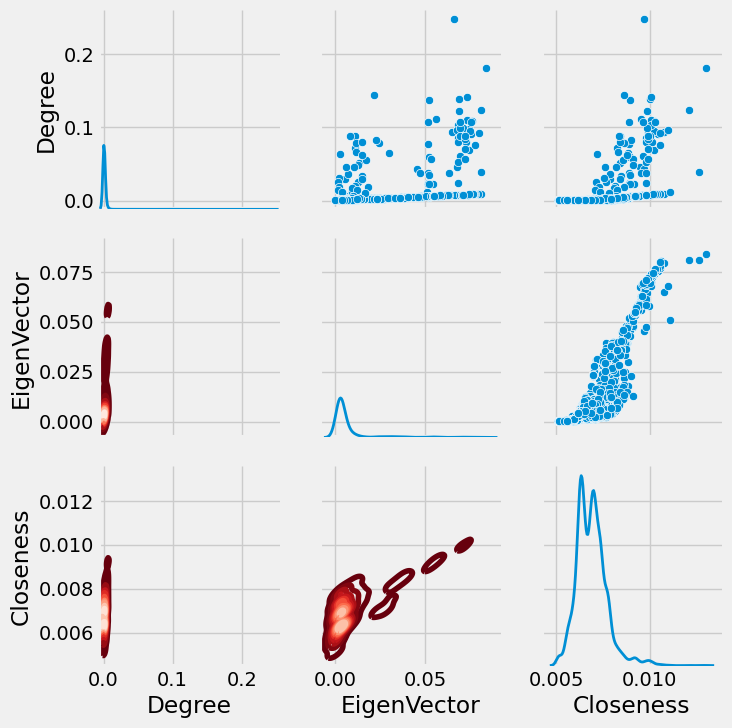

In [ ]:
fig = sns.PairGrid(df)
fig.map_upper(sns.scatterplot)
fig.map_lower(sns.kdeplot, cmap="Reds_r")
fig.map_diag(sns.kdeplot, lw=2, legend=False)

plt.savefig('all.png', transparent=True,dpi=800,bbox_inches="tight")
plt.show()

In [ ]:
k_cores = set([v for k,v in nx.core_number(gsub).items()])
print(k_cores)

{2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 40, 42, 43, 44, 45, 46, 52, 55, 62, 68}


In [ ]:
k_shell = list(nx.k_shell(gsub, 68))
print((k_shell))

['Feminist Economics', 'Socialist Economics', 'Social Credit', 'Keynesian Economics', 'Physiocracy', 'Heterodox Economics', 'Chartalism', 'Economic', 'Marginalism', 'Neo-Ricardianism', 'Chicago School Of Economics', 'Carnegie School', 'Public Choice', 'Behavioral Economics', 'Georgism', 'Cameralism', 'Malthusianism', 'New Institutional Economics', 'Manchester Liberalism', 'Austrian School', 'Rational Expectations', 'Neo-Keynesian Economics', 'Neoclassical Economics', 'Neoliberalism', 'Mercantilism', 'New Classical Macroeconomics', 'Modern Monetary Theory', 'Supply-Side Economics', 'Freiburg School', 'Distributism', 'Post-Autistic Economics', 'Buddhist Economics', 'Economic System', 'Lausanne School', 'Capability Approach', 'Neo-Malthusianism', 'Monetarism', 'French Liberal School', 'Classical Economics', 'Organizational Economics', 'Institutional Economics', 'Thermoeconomics']


In [ ]:
len(k_cores)

47